### Disk Storage Predictor
##### Author : Hencil Peter


In [271]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import os


In [223]:
class style():
    BLACK = '\033[30m'
    RED = '\033[31m'
    GREEN = '\033[32m'
    YELLOW = '\033[33m'
    BLUE = '\033[34m'
    MAGENTA = '\033[35m'
    CYAN = '\033[36m'
    WHITE = '\033[37m'
    UNDERLINE = '\033[4m'
    RESET = '\033[0m'

In [239]:
PREDICT_DURATION = 14 # 2  WEEKS 
AVAILABLE_SPACE = 1024 * 1024  # (1048576 MB =>  1 TB )

In [225]:
#load CRM app  data
crm_data = pd.read_csv('D:/hencil/Devlopment/Samples/data/CRM-APP.csv')
t25_data = pd.read_csv('D:/hencil/Devlopment/Samples/data/T25-APP.csv')



In [226]:
#prepare data for time-series analysis 
#crm data
crm_data_train = crm_data.copy()
crm_data_train.drop('date', axis=1,inplace=True)

#t25 data 
t25_data_train = t25_data.copy()
t25_data_train.drop('date', axis=1,inplace=True)

In [227]:
#prepare model - CRM
model_crm = pm.auto_arima(crm_data_train, trace=True, error_action='ignore', suppress_warnings=True)
model_crm.fit(crm_data_train)

#predict/forecast future 
forecast_crm = model_crm.predict(n_periods=PREDICT_DURATION)



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1182.184, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1234.984, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1228.185, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1224.345, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1233.923, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1216.687, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 1.263 seco

In [228]:
#prepare model - T25
model_t25 = pm.auto_arima(t25_data_train, trace=True, error_action='ignore', suppress_warnings=True)
model_t25.fit(t25_data_train)

#predict/forecast future 
forecast_t25 = model_t25.predict(n_periods=PREDICT_DURATION)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1515.359, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1562.700, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1553.560, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1550.875, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1562.460, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1545.061, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 1.488 seco

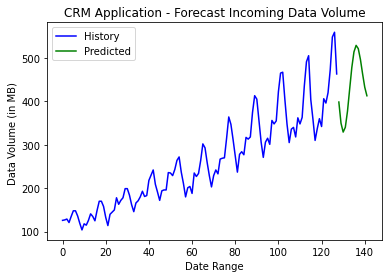

Model Predicted 6067.898418264704 MB (5.93 GB ) of incoming data in next 14 days


In [229]:
#Forecast CRM Data Volume 
index_forecast_crm= np.arange(len(crm_data_train), len(crm_data_train)+PREDICT_DURATION)
forecast_crm = pd.DataFrame(forecast_crm,index = index_forecast_crm,columns=['Prediction'])

forecast_crm_sum = np.sum(forecast_crm)
#plot the predictions 
plt.plot(crm_data_train, label='Data Growth History', color='b')
plt.plot(forecast_crm, label='Prediction', color='g')
plt.title("CRM Application - Forecast Incoming Data Volume")
plt.xlabel("Date Range")
plt.ylabel("Data Volume (in MB) ")
plt.legend(['History','Predicted'])
plt.show()
print(style.MAGENTA +style.UNDERLINE +f'Model Predicted {forecast_crm_sum.values[0]} MB ({round(forecast_crm_sum.values[0]/1024,2)} GB ) of incoming data in next {PREDICT_DURATION} days')

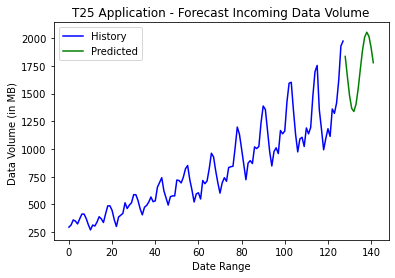

Model Predicted 24007.150628502677 MB (23.44 GB ) of incoming data in next 14 days


In [230]:
#Forecast T25 Data Volume 
index_forecast_t25= np.arange(len(t25_data_train), len(t25_data_train)+PREDICT_DURATION)
forecast_t25 = pd.DataFrame(forecast_t25,index = index_forecast_t25,columns=['Prediction'])

forecast_t25_sum = np.sum(forecast_t25)
#plot the predictions 
plt.plot(t25_data_train, label='Data Growth History', color='b')
plt.plot(forecast_t25, label='Prediction', color='g')
plt.title("T25 Application - Forecast Incoming Data Volume")
plt.xlabel("Date Range")
plt.ylabel("Data Volume (in MB) ")
plt.legend(['History','Predicted'])
plt.show()
print(style.MAGENTA +style.UNDERLINE +f'Model Predicted {forecast_t25_sum.values[0]} MB ({round(forecast_t25_sum.values[0]/1024,2)} GB ) of incoming data in next {PREDICT_DURATION} days')

In [231]:
#combine two applications' data
all_app_data = pd.DataFrame({'date':crm_data.date, 'crm_data': crm_data.value})
all_app_data.insert(2, 't25_data', np.array(t25_data.value), True)
all_app_data['total_data'] =  all_app_data['crm_data']  + all_app_data['t25_data']
all_app_data_train = all_app_data.copy()
all_app_data_train.drop('date', axis=1,inplace=True)
all_app_data_train.drop('crm_data', axis=1,inplace=True)
all_app_data_train.drop('t25_data', axis=1,inplace=True)

In [232]:
#prepare model for combined data 
model_all_data = pm.auto_arima(all_app_data_train,D=0, trace=True, error_action='ignore', suppress_warnings=True)
model_all_data.fit(all_app_data_train)

#predict/forecast future 
forecast_all_data = model_all_data.predict(n_periods=PREDICT_DURATION)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1588.183, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1563.336, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1551.933, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1588.257, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1550.489, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1552.390, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1551.301, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1549.706, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1550.846, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1562.111, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1541.425, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1550.6

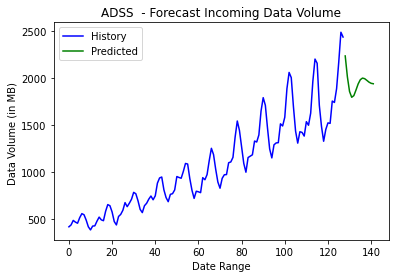

Model Predicted 27337.47322006676 MB of incoming data in next 14 days


In [233]:
#Forecast ALL Data Volume 
index_forecast_all_data= np.arange(len(all_app_data_train), len(all_app_data_train)+PREDICT_DURATION)
forecast_all_data = pd.DataFrame(forecast_all_data, index = index_forecast_all_data,columns=['Prediction'])

forecast_all_data_sum = np.sum(forecast_all_data)
#plot the predictions 
plt.plot(all_app_data_train, label='Data Growth History', color='b')
plt.plot(forecast_all_data, label='Prediction', color='g')
plt.title("ADSS  - Forecast Incoming Data Volume")
plt.xlabel("Date Range")
plt.ylabel("Data Volume (in MB) ")
plt.legend(['History','Predicted'])
plt.show()
print(style.MAGENTA +style.UNDERLINE +f'Model Predicted {forecast_all_data_sum.values[0]} MB of incoming data in next {PREDICT_DURATION} days')

In [234]:
#Approach 2 - Do not predict using total. 
#Instead, use the existing predicted values
all_app_data_copy = all_app_data.copy()

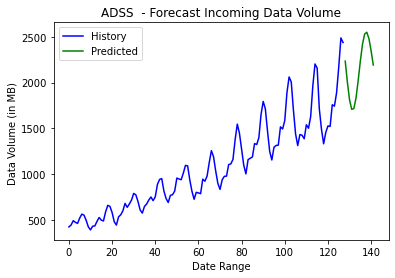

Model Predicted 30075.04904676738 MB (29.37 GB ) of incoming data in next 14 days


In [235]:
index_forecast_all_data_2= np.arange(len(all_app_data_copy), len(all_app_data_copy)+PREDICT_DURATION)
forecast_all_data_2 = forecast_crm + forecast_t25
forecast_all_data_sum_2 = np.sum(forecast_all_data_2)
#plot the predictions 
plt.plot(all_app_data_copy.total_data, label='Data Growth History', color='b')
plt.plot(forecast_all_data_2, label='Prediction', color='g')
plt.title("ADSS  - Forecast Incoming Data Volume")
plt.xlabel("Date Range")
plt.ylabel("Data Volume (in MB) ")
plt.legend(['History','Predicted'])
plt.show()
print(style.MAGENTA +style.UNDERLINE +f'Model Predicted {forecast_all_data_sum_2.values[0]} MB ({round(forecast_all_data_sum_2.values[0]/1024,2)} GB ) of incoming data in next {PREDICT_DURATION} days')

### Predict the future date on which drive will run out of space 

In [242]:
def GetRightBoundaryDays(model_crm, model_t25 , start_days, available_space):
    current_duration = start_days
    while True:
        forecast_crm_data= model_crm.predict(n_periods=current_duration)
        forecast_t25_data= model_t25.predict(n_periods=current_duration)
        forecast_all_data_sum = np.sum(forecast_crm_data) + np.sum(forecast_t25_data)
        
        if (available_space <= forecast_all_data_sum):
            return current_duration
      
        current_duration *= 2
      

In [251]:
def GetFullDiskPredictedDays(model_crm, model_t25 , start_days, available_space):
    right_boundary_days =  GetRightBoundaryDays(model_crm, model_t25 , start_days, available_space)
    current_out_of_space_days= right_boundary_days
    
    for x in range(right_boundary_days, 0, -1):
        forecast_crm_data= model_crm.predict(n_periods=x)
        forecast_t25_data= model_t25.predict(n_periods=x)
        forecast_all_data_sum = np.sum(forecast_crm_data) + np.sum(forecast_t25_data)
        
        if ( forecast_all_data_sum <= available_space ):
            return current_out_of_space_days
        
        current_out_of_space_days = x
    

In [299]:
DiskRunOutOfSpaceRemainingDays = GetFullDiskPredictedDays(model_crm, model_t25, 1, AVAILABLE_SPACE)

In [300]:
current_date = datetime.now()
time_delta= timedelta(days=DiskRunOutOfSpaceRemainingDays)
predicted_date = current_date + time_delta

In [301]:
print(style.GREEN +style.UNDERLINE + f'Available Disk Space : {AVAILABLE_SPACE} MB ( {AVAILABLE_SPACE/1024/1024} TB ) as of {current_date.strftime("%d %b, %Y")} ')
print(style.RED +style.UNDERLINE + f'Based on the current incoming data volume, Data Drive will run out of space on {predicted_date.strftime("%d %b, %Y")}')

Available Disk Space : 1048576 MB ( 1.0 TB ) as of 14 Sep, 2021 
Based on the current incoming data volume, Data Drive will run out of space on 16 Jun, 2022


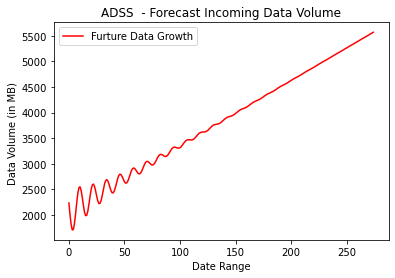

Model Predicted the 1050964.03 MB (1026.33 GB ) Disk Space will be utilized on  16 Jun, 2022


In [324]:

index_forecast_disk_out_of_space= np.arange(0, DiskRunOutOfSpaceRemainingDays)
forecast_crm_data_out_of_space = model_crm.predict(n_periods=DiskRunOutOfSpaceRemainingDays)
forecast_t25_data_out_of_space = model_t25.predict(n_periods=DiskRunOutOfSpaceRemainingDays)
all_data_out_of_space = forecast_crm_data_out_of_space + forecast_t25_data_out_of_space

#plot the predictions 
plt.plot(all_data_out_of_space , label='Data Growth History', color='r')
plt.title("ADSS  - Forecast Incoming Data Volume")
plt.xlabel("Date Range")
plt.ylabel("Data Volume (in MB) ")
plt.legend(['Furture Data Growth',])
plt.show()
print(style.RED +style.UNDERLINE +f'Model Predicted the {round(np.sum(all_data_out_of_space),2)} MB ({round(np.sum(all_data_out_of_space)/1024,2)} GB ) Disk Space will be utilized on  {predicted_date.strftime("%d %b, %Y")}')

### 95 % confidence example 

In [359]:
t25_data_copy2 = t25_data.copy()
t25_data_copy2.drop('date', axis=1,inplace=True)

In [360]:
t25_data_copy2_train = t25_data_copy2[:(len(t25_data_copy2) - PREDICT_DURATION)]
t25_data_copy2_validation = t25_data_copy2[(len(t25_data_copy2) - PREDICT_DURATION):]

In [361]:
model_t25_confidence= pm.auto_arima(t25_data_copy2_train, trace=True, error_action='ignore', suppress_warnings=True)
model_t25_confidence.fit(t25_data_copy2_train)

#predict/forecast future 
forecast_t25_confidence, confint = model_t25_confidence.predict(n_periods=PREDICT_DURATION, return_conf_int=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1361.254, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1355.622, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1350.633, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1360.525, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1342.939, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1344.388, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1352.000, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1341.984, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1349.427, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1354.490, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1343.016, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1339.7

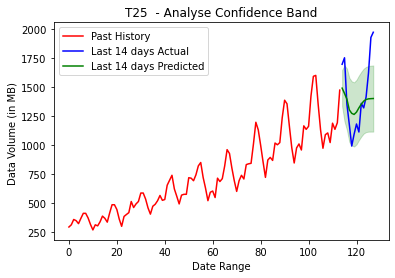

In [377]:
#plot the predictions 
index_forecast_t25_confidence= np.arange(len(t25_data_copy2_train), len(t25_data_copy2_train)+PREDICT_DURATION)
forecast_t25_confidence = pd.DataFrame(forecast_t25_confidence, index = index_forecast_t25_confidence,columns=['Prediction'])

forecast_t25_confidence_series = pd.Series(forecast_t25_confidence.Prediction, index=index_forecast_t25_confidence)
lower_series = pd.Series(confint[:, 0], index=index_forecast_t25_confidence)
upper_series = pd.Series(confint[:, 1], index=index_forecast_t25_confidence)


plt.plot(t25_data_copy2_train ,  color='r')
plt.plot(t25_data_copy2_validation ,  color='b')
plt.plot(forecast_t25_confidence, color='g')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='g', alpha=.20)
plt.title("T25  - Analyse Confidence Band")
plt.xlabel("Date Range")
plt.ylabel("Data Volume (in MB) ")
plt.legend(['Past History','Last 14 days Actual','Last 14 days Predicted'])
plt.show()